In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('RL_lib/Agents/PPO')
sys.path.append('RL_lib/Utils')
sys.path.append('../')

In [4]:
import numpy as np
import pdb
import matplotlib.pyplot as plt

import env_lib
from policy_ppo import Policy
from value_function import Value_function
from utils import Mapminmax,Logger,Scaler
import utils
from env_gaudet_lander import LanderEnvironment, int_to_bin, bin_to_int

In [5]:
def ppo_policy(s):
    s_norm = input_normalizer.apply(s)
    a = policy.sample(s_norm)
    return bin_to_int(list(a[1][0]))

def random_policy(s):
    return np.random.randint(16)

def policy_demo(H, env, N_ep, show=False):
    R_ep = []
    for ep_no in range(N_ep):
        s = env.reset()
        done = False
        Rt = []
        while not done:
            a = H(s)
            s, r, done, _ = env.step(a)
            if show:
                env.render()
            Rt.append(np.sum(r))
        R_ep.append(Rt)
    return R_ep

## Initial policy testing

In [ ]:
env = LanderEnvironment()

In [ ]:
obs_dim = 12
act_dim = 4

policy = Policy(obs_dim,act_dim,kl_targ=0.001,epochs=20, beta=0.1, shuffle=True, servo_kl=True, discretize=True)

fname = "optimize_4km"
input_normalizer = utils.load_run(policy,fname)
print(input_normalizer)

In [30]:
policy.test_mode=True
R = policy_demo(ppo_policy,env,1)

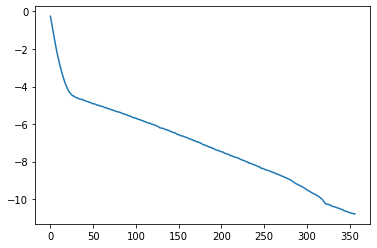

In [31]:
plt.plot(np.cumsum(R[0]))

## New reward function

In [13]:
env = LanderEnvironment()
obs_dim = 12
act_dim = 4

policy = Policy(obs_dim,act_dim,kl_targ=0.001,epochs=20, beta=0.1, shuffle=True, servo_kl=True, discretize=True)

fname = "opt_discrete_4km"
input_normalizer = utils.load_run(policy,fname)

Inertia Tensor:  [[2000.    0.    0.]
 [   0. 2000.    0.]
 [   0.    0. 3200.]]
Lander Model: 
 - apf_v0:  70
 - apf_vf1:  [ 0.  0. -2.]
 - apf_vf2:  [ 0.  0. -1.]
 - apf_atarg:  15.0
 - apf_tau1:  20
 - apf_tau2:  100.0
Attitude Constraint
Reward_terminal
lander env att 2 fixed
Actions
[[0.]
 [1.]]
dict_keys(['h1/kernel:0', 'h1/bias:0', 'h2/kernel:0', 'h2/bias:0', 'h3/kernel:0', 'h3/bias:0', 'means/kernel:0', 'means/bias:0', 'logvars:0'])


In [23]:
policy.test_mode=True
env.r_type = 'sparse'
s = env.reset()
done = False
while not done:
    a = ppo_policy(s)
    s, r, done, info = env.step(a)
print(r)

6dof dynamics model
Quaternion_attitude
Thruster Config Shape:  (4, 6) 4
queue fixed
Flat Constraint
99.98


In [21]:
env.main_env.lander.show_final_stats()

Final Stats (mean,std,min,max)
position |     0.4    -0.8    -0.0 |     0.6     1.7     0.0 |    -0.2    -2.6    -0.0 |     1.3     1.4    -0.0
velocity |  -0.218   0.044  -1.449 |   0.113   0.116   0.235 |  -0.359  -0.090  -1.738 |  -0.082   0.193  -1.161
fuel     |264.16 |  5.48 |258.05 |271.35
attitude_321 |   0.042   0.025   0.007 |   0.049   0.046   0.070 |  -0.022  -0.040  -0.065 |   0.097   0.062   0.102
w        |   0.307  -0.001   0.000 |   0.287   0.001   0.000 |  -0.001  -0.002  -0.000 |   0.691   0.001   0.000
glideslope |  12.797 |   6.456 |   4.176 |  19.713


In [18]:
env.main_env.lander.show_final_stats()

Final Stats (mean,std,min,max)
position |     1.3     1.4    -0.0 |     0.0     0.0     0.0 |     1.3     1.4    -0.0 |     1.3     1.4    -0.0
velocity |  -0.359   0.193  -1.448 |   0.000   0.000   0.000 |  -0.359   0.193  -1.448 |  -0.359   0.193  -1.448
fuel     |263.09 |  0.00 |263.09 |263.09
attitude_321 |   0.097   0.052  -0.065 |   0.000   0.000   0.000 |   0.097   0.052  -0.065 |   0.097   0.052  -0.065
w        |   0.691   0.001   0.000 |   0.000   0.000   0.000 |   0.691   0.001   0.000 |   0.691   0.001   0.000
glideslope |   4.176 |   0.000 |   4.176 |   4.176
